In [2]:
!pip install matplotlib

In [3]:
!pip install sklearn

## Предобработка данных

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [5]:
data = pd.read_excel('Данные.xlsx', header = 0, engine = 'openpyxl', nrows = 192)

In [6]:
data.head()

,Компания,Дата,Рейтинг,Рейтинг Класс,PD,Денежные средства,Финансовые активы + Депозиты,Итого Активы,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,...,Доходность US Treasury 5,Доходность US Treasury 10,Доходность ОФЗ 2,Доходность ОФЗ 5,Доходность ОФЗ 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
0,Алмазная Осень,44104,ruAA,2,0.004,1.978310e+08,3.609074e+10,3.683009e+10,0,338000.0,...,0.28,0.69,4.28,4.99,6.03,"2.905,81",0.103181,7.938218,1,0
1,Алмазная Осень,43942,ruAA,2,0.004,7.487060e+08,3.354566e+10,3.491423e+10,0,2008000.0,...,0.34,0.58,5.53,5.78,6.19,"2.488,02",0.054959,12.606684,1,0
2,Алмазная Осень,43614,ruAA,2,0.004,7.033770e+08,2.984306e+10,3.103310e+10,0,1428000.0,...,2.05,2.25,7.37,7.58,7.91,"2.641,15",0.231275,11.065649,1,0
3,Алмазная Осень,43255,ruAA,2,0.004,4.312370e+08,2.357436e+10,2.511377e+10,0,1261000.0,...,2.78,2.94,6.67,6.86,7.22,"2.323,64",0.269300,11.684484,1,0
4,Алмазная Осень,42899,ruAA,2,0.004,1.043698e+09,1.769658e+10,1.931554e+10,0,282000.0,...,1.79,2.21,8.00,7.82,7.64,"1.861,27",0.219727,12.190640,1,0


In [7]:
len(data)

192

In [8]:
target = data['PD'].to_numpy()

In [9]:
data = data.drop(labels = ['Компания', 'Дата', 'Рейтинг'], axis = 1)

In [10]:
print(target)

[0.004  0.004  0.004  0.004  0.004  0.     0.007  0.02   0.02   0.02
 0.02   0.02   0.02   0.004  0.004  0.004  0.004  0.004  0.007  0.007
 0.007  0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.007  0.02   0.02   0.4    0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
 0.     0.0027 0.004  0.004  0.004  0.004  0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.0027 0.0027 0.004  0.
 0.004  0.004  0.004  0.     0.     0.     0.     0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.004  0.004  0.004
 0.004  0.004  0.007  0.007  0.007  0.004  0.004  0.004  0.004  0.004
 0.     0.     0.     0.004  0.004  0.     0.     0.     0.     0.
 0.007  0.007  0.007  0.007  0.007  0.007  0.007  0.4    0.02   0.
 0.007  0.     0.     0.     0.     0.007  0.007  0.02   0.02   0.1
 0.1    0.02   0.02   0.007  0.007  0.007  0.02   0.02   0.02   0.02
 0.02   0.02   0.02   0.02   0.02   0.02   0.02 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Рейтинг Класс                                    192 non-null    int64  
 1   PD                                               192 non-null    float64
 2   Денежные средства                                192 non-null    float64
 3   Финансовые активы + Депозиты                     192 non-null    float64
 4   Итого Активы                                     192 non-null    float64
 5   Инвестиции в ассоциированные предприятия         192 non-null    int64  
 6   Кредиторская задолженность                       192 non-null    float64
 7   Итого обязательства                              192 non-null    float64
 8   Обязательства по договорам / Пенсионные резервы  192 non-null    float64
 9   Капитал                         

In [12]:
data_with_no_na = data.dropna()
print('Данных с пропусками:', len(data))
print('Данных без пропусков:', len(data_with_no_na))

Данных с пропусками: 192
Данных без пропусков: 172


In [13]:
data_with_no_na['Индекс Мосбиржи']

0      2.905,81
1      2.488,02
2      2.641,15
3      2.323,64
4      1.861,27
         ...   
186    1.433,52
187    1.525,52
188    1.425,24
189    1.705,41
190    1.705,41
Name: Индекс Мосбиржи, Length: 172, dtype: object

In [14]:
data_with_no_na['Индекс Мосбиржи'] = data_with_no_na['Индекс Мосбиржи'].str.replace('.', '')
data_with_no_na['Индекс Мосбиржи'] = data_with_no_na['Индекс Мосбиржи'].str.replace(',', '.')

In [15]:
data_with_no_na['Индекс Мосбиржи']

0      2905.81
1      2488.02
2      2641.15
3      2323.64
4      1861.27
        ...   
186    1433.52
187    1525.52
188    1425.24
189    1705.41
190    1705.41
Name: Индекс Мосбиржи, Length: 172, dtype: object

Заполним пропуски в переменных "Итого взносов, Итого выплат"

Эти значения зависят от прибыли. Логичным решением будет пропуски как некоторый средний % от прибыли. Посчитаем средную долю этих переменных в прибыли по всей выборке и заполним пропуски таким образом

In [16]:
contributions = data_with_no_na['Итого Взносов'][data_with_no_na['Итого Взносов'] != 0].to_numpy()
payments = data_with_no_na['Итого выплат'][data_with_no_na['Итого выплат'] != 0].to_numpy()
profits = data_with_no_na['Прибыль'][data_with_no_na['Итого Взносов'] != 0].to_numpy()
contrib_perc = (contributions / profits).mean()
payments_perc = (payments / profits).mean()
print('Доля взносов в прибыли:', (contributions / profits).mean())
print('Доля выплат в прибыли:', (payments / profits).mean()) # выплаты в абсолютном значении

Доля взносов в прибыли: 439.27493954799786
Доля выплат в прибыли: 268.39909984068703


In [17]:
data_with_no_na['Итого Взносов'][data_with_no_na['Итого Взносов'] == 0] = data_with_no_na['Прибыль'][data_with_no_na['Итого Взносов'] == 0] * contrib_perc
data_with_no_na['Итого выплат'][data_with_no_na['Итого выплат'] == 0] = data_with_no_na['Прибыль'][data_with_no_na['Итого выплат'] == 0] * payments_perc

In [18]:
data_with_no_na.columns

Index(['Рейтинг Класс', 'PD', 'Денежные средства',
       'Финансовые активы + Депозиты', 'Итого Активы',
       'Инвестиции в ассоциированные предприятия',
       'Кредиторская задолженность', 'Итого обязательства',
       'Обязательства по договорам / Пенсионные резервы', 'Капитал', 'Прибыль',
       'Итого Взносов', 'Итого выплат', 'Инфляция', 'RUONIA',
       'Доходность US Treasury 2', 'Доходность US Treasury 5',
       'Доходность US Treasury 10', 'Доходность ОФЗ 2', 'Доходность ОФЗ 5',
       'Доходность ОФЗ 10', 'Индекс Мосбиржи', 'ROE', 'Leverage',
       'Участие АСВ', 'Кэптивность'],
      dtype='object')

In [19]:
data_with_no_na.isna().any()

Рейтинг Класс                                      False
PD                                                 False
Денежные средства                                  False
Финансовые активы + Депозиты                       False
Итого Активы                                       False
Инвестиции в ассоциированные предприятия           False
Кредиторская задолженность                         False
Итого обязательства                                False
Обязательства по договорам / Пенсионные резервы    False
Капитал                                            False
Прибыль                                            False
Итого Взносов                                      False
Итого выплат                                       False
Инфляция                                           False
RUONIA                                             False
Доходность US Treasury 2                           False
Доходность US Treasury 5                           False
Доходность US Treasury 10      

In [20]:
index_text = data_with_no_na.columns

In [21]:
data_with_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 190
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Рейтинг Класс                                    172 non-null    int64  
 1   PD                                               172 non-null    float64
 2   Денежные средства                                172 non-null    float64
 3   Финансовые активы + Депозиты                     172 non-null    float64
 4   Итого Активы                                     172 non-null    float64
 5   Инвестиции в ассоциированные предприятия         172 non-null    int64  
 6   Кредиторская задолженность                       172 non-null    float64
 7   Итого обязательства                              172 non-null    float64
 8   Обязательства по договорам / Пенсионные резервы  172 non-null    float64
 9   Капитал                         

In [22]:
data_with_no_na['Индекс Мосбиржи'] = data_with_no_na['Индекс Мосбиржи'].astype(np.float32)

In [23]:
data_with_no_na['Кредиторская задолженность'].to_numpy()

array([3.3800000e+05, 2.0080000e+06, 1.4280000e+06, 1.2610000e+06,
       2.8200000e+05, 3.9270000e+07, 5.0647000e+07, 2.1538000e+07,
       2.9395000e+07, 2.5371000e+07, 2.5372000e+07, 2.5373000e+07,
       1.8000000e+05, 0.0000000e+00, 1.8000000e+05, 0.0000000e+00,
       0.0000000e+00, 2.5320000e+06, 6.9660000e+06, 3.9270000e+06,
       1.7290000e+06, 1.4930000e+06, 1.0080000e+06, 2.9707990e+09,
       5.4759900e+08, 9.7217100e+08, 5.8697400e+08, 9.2015000e+08,
       2.2271300e+08, 5.4676300e+08, 3.1630300e+08, 2.4177000e+07,
       2.4177000e+07, 4.6990000e+06, 3.5670000e+06, 1.2720000e+06,
       7.9000000e+05, 2.6736080e+09, 0.0000000e+00, 2.5744800e+08,
       1.2104180e+09, 4.0159300e+08, 1.0202800e+08, 7.0645100e+08,
       7.0645100e+08, 1.7103800e+08, 1.3500000e+05, 3.8800000e+06,
       5.4100000e+05, 0.0000000e+00, 1.8269300e+08, 2.9272300e+08,
       3.1040930e+07, 6.5180000e+06, 1.1936000e+07, 1.7889000e+07,
       3.2891000e+07, 0.0000000e+00, 5.4801400e+08, 4.8521600e

In [24]:
from sklearn import preprocessing

x = data_with_no_na.drop(labels = ['PD', 'Рейтинг Класс', 'Участие АСВ', 'Кэптивность'], axis = 1).to_numpy()
print(np.isnan(x).any()) #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
print(np.isnan(x_scaled).any())
index = data_with_no_na.columns.drop(labels = ['Рейтинг Класс', 'PD', 'Участие АСВ', 'Кэптивность'])
data_with_no_na[index] = x_scaled
data_with_no_na.isna().any()

False
False


Рейтинг Класс                                      False
PD                                                 False
Денежные средства                                  False
Финансовые активы + Депозиты                       False
Итого Активы                                       False
Инвестиции в ассоциированные предприятия           False
Кредиторская задолженность                         False
Итого обязательства                                False
Обязательства по договорам / Пенсионные резервы    False
Капитал                                            False
Прибыль                                            False
Итого Взносов                                      False
Итого выплат                                       False
Инфляция                                           False
RUONIA                                             False
Доходность US Treasury 2                           False
Доходность US Treasury 5                           False
Доходность US Treasury 10      

In [25]:
data_with_no_na.isna()

,Рейтинг Класс,PD,Денежные средства,Финансовые активы + Депозиты,Итого Активы,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,Итого обязательства,Обязательства по договорам / Пенсионные резервы,Капитал,...,Доходность US Treasury 5,Доходность US Treasury 10,Доходность ОФЗ 2,Доходность ОФЗ 5,Доходность ОФЗ 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
data_with_no_na.head()

,Рейтинг Класс,PD,Денежные средства,Финансовые активы + Депозиты,Итого Активы,Инвестиции в ассоциированные предприятия,Кредиторская задолженность,Итого обязательства,Обязательства по договорам / Пенсионные резервы,Капитал,...,Доходность US Treasury 5,Доходность US Treasury 10,Доходность ОФЗ 2,Доходность ОФЗ 5,Доходность ОФЗ 10,Индекс Мосбиржи,ROE,Leverage,Участие АСВ,Кэптивность
0,2,0.004,0.004258,0.053702,0.054272,0.0,0.000071,0.050690,0.050837,0.036726,...,0.000000,0.036545,0.008679,0.030415,0.080000,0.888123,0.445807,0.154977,1,0
1,2,0.004,0.016196,0.049915,0.051449,0.0,0.000420,0.050129,0.050297,0.025931,...,0.021739,0.000000,0.129219,0.103226,0.097778,0.659268,0.444599,0.165363,1,0
2,2,0.004,0.015214,0.044406,0.045730,0.0,0.000299,0.043158,0.042786,0.025592,...,0.641304,0.554817,0.306654,0.269124,0.288889,0.743149,0.449014,0.161935,1,0
3,2,0.004,0.009316,0.035078,0.037007,0.0,0.000264,0.035864,0.035748,0.021871,...,0.905797,0.784053,0.239151,0.202765,0.212222,0.569225,0.449966,0.163311,1,0
4,2,0.004,0.022589,0.026332,0.028463,0.0,0.000059,0.027640,0.027470,0.018280,...,0.547101,0.541528,0.367406,0.291244,0.258889,0.315951,0.448725,0.164437,1,0


In [27]:
len(data_with_no_na.columns)

26

In [28]:
# Стандартизация убрала имена колонок - переименуем обратно
rename_dict = {}
i = 0
for element in data_with_no_na.columns:
    rename_dict[element] = ['Класс', 'PD', 'Cash', 'ФА + Деп.', 'Активы', 'Инвестиции', 'КЗ', 'Обязательства',
    'Обяз. по договорам', 'Капитал','Прибыль',
    'Взносов', 'Выплат', 'Инфляция', 'RUONIA',
    'Treasury 2', 'Treasury 5',
    'Treasury 10', 'ОФЗ 2', 'ОФЗ 5',
    'ОФЗ 10', 'IMOEX', 'ROE', 'Leverage', 'АСВ', 'Кэпт'][i]
    i += 1
data_with_no_na = data_with_no_na.rename(columns=rename_dict)

In [29]:
print(len(data_with_no_na.columns))

26


In [30]:
index_text = ['Класс', 'PD', 'Cash', 'ФА + Деп.', 'Активы', 'Инвестиции', 'КЗ', 'Обязательства',
    'Обяз. по договорам', 'Капитал','Прибыль',
    'Взносов', 'Выплат', 'Инфляция', 'RUONIA',
    'Treasury 2', 'Treasury 5',
    'Treasury 10', 'ОФЗ 2', 'ОФЗ 5',
    'ОФЗ 10', 'IMOEX', 'ROE', 'Leverage', 'АСВ', 'Кэпт']

## Гистограмма

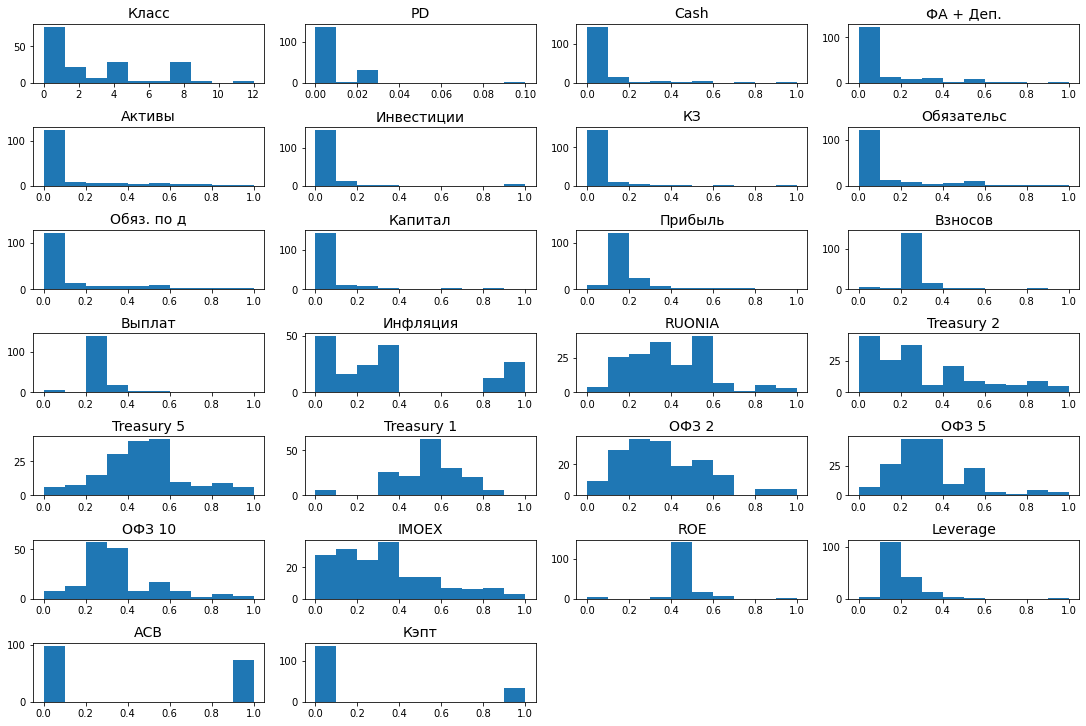

In [31]:
# Построим графики распределения основных переменных
f, ax = plt.subplots(nrows=7, ncols = 4, figsize = (15, 10))
for i in range(6):
    for j in range(4):
        column_now = index_text[j + 4 * i]
        ax[i][j].hist(data_with_no_na[column_now], bins = 10)
        ax[i][j].set_title(index_text[j + 4 * i][:10], fontsize = 14)
ax[6][0].hist(data_with_no_na['АСВ'])
ax[6][0].set_title('АСВ', fontsize = 14)
ax[6][1].set_title('Кэпт', fontsize = 14)
ax[6][1].hist(data_with_no_na['Кэпт'])
f.delaxes(ax[6, 2])
f.delaxes(ax[6, 3])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('hist.png', dpi = 400)

In [32]:
data_with_no_na.head()

,Класс,PD,Cash,ФА + Деп.,Активы,Инвестиции,КЗ,Обязательства,Обяз. по договорам,Капитал,...,Treasury 5,Treasury 10,ОФЗ 2,ОФЗ 5,ОФЗ 10,IMOEX,ROE,Leverage,АСВ,Кэпт
0,2,0.004,0.004258,0.053702,0.054272,0.0,0.000071,0.050690,0.050837,0.036726,...,0.000000,0.036545,0.008679,0.030415,0.080000,0.888123,0.445807,0.154977,1,0
1,2,0.004,0.016196,0.049915,0.051449,0.0,0.000420,0.050129,0.050297,0.025931,...,0.021739,0.000000,0.129219,0.103226,0.097778,0.659268,0.444599,0.165363,1,0
2,2,0.004,0.015214,0.044406,0.045730,0.0,0.000299,0.043158,0.042786,0.025592,...,0.641304,0.554817,0.306654,0.269124,0.288889,0.743149,0.449014,0.161935,1,0
3,2,0.004,0.009316,0.035078,0.037007,0.0,0.000264,0.035864,0.035748,0.021871,...,0.905797,0.784053,0.239151,0.202765,0.212222,0.569225,0.449966,0.163311,1,0
4,2,0.004,0.022589,0.026332,0.028463,0.0,0.000059,0.027640,0.027470,0.018280,...,0.547101,0.541528,0.367406,0.291244,0.258889,0.315951,0.448725,0.164437,1,0


In [33]:
data_with_no_na = data_with_no_na.drop('Инвестиции', axis = 1)

## Выбросы

In [34]:
from scipy import stats
import numpy as np
#data_with_no_na.drop(labels = ['АСВ', 'Кэпт', 'Класс'], axis = 1).dropna()
#stats.zscore(data_with_no_na.drop(labels = ['АСВ', 'Кэпт', 'Класс'], axis = 1).dropna())
z = np.abs(stats.zscore(data_with_no_na.drop(labels = ['АСВ', 'Кэпт', 'Класс'], axis = 1).dropna()))
print(z)

[[0.23549214 0.43452813 0.34305434 ... 2.39670489 0.16038666 0.51475874]
 [0.23549214 0.35655072 0.36242482 ... 1.41042728 0.17323407 0.40573143]
 [0.23549214 0.36296712 0.3906052  ... 1.77192124 0.12625945 0.44172074]
 ...
 [1.05292608 0.41381626 0.46531574 ... 1.09847922 4.9038783  1.61517454]
 [1.05292608 0.41381626 0.46531574 ... 0.43708135 4.9038783  1.61517454]
 [1.05292608 0.41381626 0.46531574 ... 0.43708135 4.9038783  1.61517454]]


In [35]:
threshold = 3
outliers = np.where(z > threshold)[0]

In [36]:
outliers

array([  0,   1,  12,  23,  28,  28,  28,  29,  33,  34,  35,  36,  37,
        37,  43,  43,  44,  44,  53,  53,  53,  54,  54,  54,  54,  55,
        58,  69,  69,  69,  70,  70,  70,  70,  71,  71,  71,  71,  71,
        71,  72,  72,  72,  72,  73,  73,  74,  75,  78,  85, 110, 110,
       110, 111, 116, 116, 117, 117, 119, 119, 119, 119, 147, 147, 147,
       162, 163, 164, 168, 169, 170, 171], dtype=int64)

In [37]:
print("Количество выбросов:", len(np.unique(outliers)))

Количество выбросов: 39


In [38]:
data_with_no_na = data_with_no_na.reset_index().drop(index = outliers)

In [39]:
len(data_with_no_na)

133

In [40]:
data_with_no_na.head()

,index,Класс,PD,Cash,ФА + Деп.,Активы,КЗ,Обязательства,Обяз. по договорам,Капитал,...,Treasury 5,Treasury 10,ОФЗ 2,ОФЗ 5,ОФЗ 10,IMOEX,ROE,Leverage,АСВ,Кэпт
2,2,2,0.004,0.015214,0.044406,0.045730,0.000299,0.043158,0.042786,0.025592,...,0.641304,0.554817,0.306654,0.269124,0.288889,0.743149,0.449014,0.161935,1,0
3,3,2,0.004,0.009316,0.035078,0.037007,0.000264,0.035864,0.035748,0.021871,...,0.905797,0.784053,0.239151,0.202765,0.212222,0.569225,0.449966,0.163311,1,0
4,4,2,0.004,0.022589,0.026332,0.028463,0.000059,0.027640,0.027470,0.018280,...,0.547101,0.541528,0.367406,0.291244,0.258889,0.315951,0.448725,0.164437,1,0
5,5,0,0.000,0.005720,0.018551,0.019873,0.008221,0.017285,0.017280,0.009937,...,0.315217,0.345515,0.530376,0.416590,0.391111,0.329453,0.649305,0.231853,1,0
6,6,4,0.007,0.004058,0.017455,0.018630,0.010603,0.015990,0.015963,0.009069,...,0.496377,0.564784,0.577628,0.580645,0.633333,0.223815,0.462881,0.304093,0,0


## Корреляций

In [41]:
!pip3 install seaborn

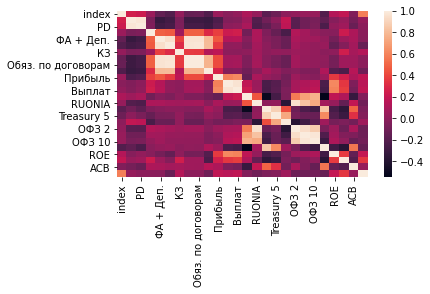

In [42]:
# Посмотрим корреляцию между переменными
import seaborn as sns
correlation_matrix = data_with_no_na.corr()
heat = sns.heatmap(correlation_matrix)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
heat.figure.savefig('heatmap.png', dpi = 400)

In [43]:
correlation_matrix

,index,Класс,PD,Cash,ФА + Деп.,Активы,КЗ,Обязательства,Обяз. по договорам,Капитал,...,Treasury 5,Treasury 10,ОФЗ 2,ОФЗ 5,ОФЗ 10,IMOEX,ROE,Leverage,АСВ,Кэпт
index,1.000000,0.255003,0.232499,0.048211,-0.148498,-0.211692,0.027525,-0.135014,-0.132015,-0.221744,...,-0.115094,0.001953,0.022752,0.037684,0.037800,-0.208718,0.140362,0.194528,-0.040804,0.586399
Класс,0.255003,1.000000,0.981787,-0.064827,-0.314765,-0.275484,-0.059507,-0.292908,-0.292888,-0.312776,...,0.002534,0.194908,-0.182538,-0.100471,-0.069018,-0.162913,-0.020712,0.035344,-0.081160,0.033820
PD,0.232499,0.981787,1.000000,-0.048248,-0.284034,-0.250327,-0.050801,-0.264085,-0.263888,-0.292940,...,-0.064528,0.175658,-0.193175,-0.099694,-0.059005,-0.234931,0.020850,0.069249,-0.124746,0.000308
Cash,0.048211,-0.064827,-0.048248,1.000000,0.484152,0.464717,0.064779,0.485694,0.487100,0.302039,...,-0.137363,-0.243654,0.136155,0.077809,0.028711,-0.007792,-0.017245,0.229503,0.116108,-0.005592
ФА + Деп.,-0.148498,-0.314765,-0.284034,0.484152,1.000000,0.950023,0.384583,0.965533,0.966351,0.801135,...,-0.066336,-0.127019,0.111872,0.072776,0.066855,0.024381,-0.081560,0.054244,0.101652,-0.010400
Активы,-0.211692,-0.275484,-0.250327,0.464717,0.950023,1.000000,0.310269,0.975793,0.975931,0.807095,...,-0.057692,-0.133138,0.089186,0.045855,0.029041,0.045489,-0.141266,-0.029176,0.081126,-0.129408
КЗ,0.027525,-0.059507,-0.050801,0.064779,0.384583,0.310269,1.000000,0.368138,0.365434,0.134389,...,0.018791,0.014485,0.057784,0.035352,0.027513,-0.003910,0.009428,0.248717,0.092680,0.142659
Обязательства,-0.135014,-0.292908,-0.264085,0.485694,0.965533,0.975793,0.368138,1.000000,0.999839,0.772428,...,-0.071693,-0.130285,0.081581,0.032182,0.017198,0.014412,-0.080068,0.065530,0.068129,0.000881
Обяз. по договорам,-0.132015,-0.292888,-0.263888,0.487100,0.966351,0.975931,0.365434,0.999839,1.000000,0.773256,...,-0.075682,-0.132496,0.083084,0.033991,0.019235,0.010146,-0.079094,0.065618,0.064631,0.001321
Капитал,-0.221744,-0.312776,-0.292940,0.302039,0.801135,0.807095,0.134389,0.772428,0.773256,1.000000,...,0.033982,-0.040740,-0.010906,-0.044899,-0.046554,0.122363,-0.204051,-0.240097,0.155286,-0.100867


In [44]:
dataCorr = correlation_matrix[abs(correlation_matrix) >= 0.01].stack().reset_index()
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]
 
# filtering out lower/upper triangular duplicates 
dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)
 
dataCorr.sort_values(by=[0], ascending=False).head(10) #Get 10 highest correlation of pairwaise attributes

,level_0,level_1,0
177,Обязательства,Обяз. по договорам,0.999839
27,Класс,PD,0.981787
483,ОФЗ 5,ОФЗ 10,0.978076
132,Активы,Обяз. по договорам,0.975931
131,Активы,Обязательства,0.975793
278,Взносов,Выплат,0.969116
106,ФА + Деп.,Обяз. по договорам,0.966351
105,ФА + Деп.,Обязательства,0.965533
358,RUONIA,ОФЗ 2,0.953431
103,ФА + Деп.,Активы,0.950023


In [45]:
data_with_no_na = data_with_no_na.drop(
    labels=['Активы', 
    'Обязательства', 
    'Выплат', 
    'Взносов', 
    'ОФЗ 2',
    'ОФЗ 5', 
    'ОФЗ 10'], 
    axis = 1)

**Преобразования:**

* Уберем переменные с итогами, так как они достаточно сильно коррелируют со всем остальным.

* Оставим вместо всех доходностей ОФЗ ставку RUONIA, так как она сильно коррелирует со ставками по ОФЗ.

* Вместо взносов и выплат оставим прибыль, так как она фактически состоит из этих факторов и они коррелируют друг с другом

In [46]:
data_with_no_na.head()

,index,Класс,PD,Cash,ФА + Деп.,КЗ,Обяз. по договорам,Капитал,Прибыль,Инфляция,RUONIA,Treasury 2,Treasury 5,Treasury 10,IMOEX,ROE,Leverage,АСВ,Кэпт
2,2,2,0.004,0.015214,0.044406,0.000299,0.042786,0.025592,0.150622,0.060894,0.355750,0.705036,0.641304,0.554817,0.743149,0.449014,0.161935,1,0
3,3,2,0.004,0.009316,0.035078,0.000264,0.035748,0.021871,0.149394,0.176974,0.281775,0.859712,0.905797,0.784053,0.569225,0.449966,0.163311,1,0
4,4,2,0.004,0.022589,0.026332,0.000059,0.027470,0.018280,0.144035,0.010466,0.440484,0.449640,0.547101,0.541528,0.315951,0.448725,0.164437,1,0
5,5,0,0.000,0.005720,0.018551,0.008221,0.017280,0.009937,0.190649,0.284491,0.524546,0.219424,0.315217,0.345515,0.329453,0.649305,0.231853,1,0
6,6,4,0.007,0.004058,0.017455,0.010603,0.015963,0.009069,0.138636,1.000000,0.513786,0.215827,0.496377,0.564784,0.223815,0.462881,0.304093,0,0


Построим модель и найдем **p-value** для переменных 

## Построение модели

In [47]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)

In [48]:
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']

In [49]:
!pip3 install statsmodels

In [50]:
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.492
Method:                 Least Squares   F-statistic:                              8.203
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    2.59e-12
Time:                        12:48:44   Log-Likelihood:                          428.13
No. Observations:                 119   AIC:                                     -824.3
Df Residuals:                     103   BIC:                                     -779.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cash                   0.0201      0.011      1.760      0.081      -0.003       0.043
ФА + Деп.             -0.0211      0.035     -0.598      0.551      -0.091       0.049
КЗ                     0.0078      0.012      0.669      0.505      -0.015       0.031
Обяз. по договорам     0.0123      0.030      0.409      0.683      -0.048       0.072
Капитал               -0.0336      0.023     -1.481      0.142      -0.079       0.011
Прибыль               -0.0097      0.023     -0.422      0.674      -0.055       0.036
Инфляция               0.0035      0.003      1.077      0.284      -0.003       0.010
RUONIA                -0.0051      0.007     -0.735      0.464      -0.019       0.009
Treasury 2             0.0040      0.014      0.285      0.777      -0.024       0.032
Treasury 5            -0.0209      0.024     -0.883      0.379      -0.068       0.026
Treasury 10            0.0288      0.017      1.648      0.102      -0.006       0.063
IMOEX                 -0.0007      0.007     -0.104      0.917      -0.015       0.013
ROE                    0.0120      0.014      0.832      0.408      -0.017       0.041
Leverage              -0.0197      0.015     -1.308      0.194      -0.050       0.010
АСВ                    0.0021      0.002      1.178      0.241      -0.001       0.006
Кэпт                  -0.0004      0.002     -0.218      0.828      -0.004       0.004
==============================================================================
Omnibus:                        7.671   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.484
Skew:                           0.395   Prob(JB):                       0.0644
Kurtosis:                       2.306   Cond. No.                         93.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print(X_test_linear.shape)
print(X_train_linear.shape)

(14, 16)
(119, 16)


In [52]:
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.492
Method:                 Least Squares   F-statistic:                              8.203
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    2.59e-12
Time:                        12:48:45   Log-Likelihood:                          428.13
No. Observations:                 119   AIC:                                     -824.3
Df Residuals:                     103   BIC:                                     -779.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cash                   0.0201      0.011      1.760      0.081      -0.003       0.043
ФА + Деп.             -0.0211      0.035     -0.598      0.551      -0.091       0.049
КЗ                     0.0078      0.012      0.669      0.505      -0.015       0.031
Обяз. по договорам     0.0123      0.030      0.409      0.683      -0.048       0.072
Капитал               -0.0336      0.023     -1.481      0.142      -0.079       0.011
Прибыль               -0.0097      0.023     -0.422      0.674      -0.055       0.036
Инфляция               0.0035      0.003      1.077      0.284      -0.003       0.010
RUONIA                -0.0051      0.007     -0.735      0.464      -0.019       0.009
Treasury 2             0.0040      0.014      0.285      0.777      -0.024       0.032
Treasury 5            -0.0209      0.024     -0.883      0.379      -0.068       0.026
Treasury 10            0.0288      0.017      1.648      0.102      -0.006       0.063
IMOEX                 -0.0007      0.007     -0.104      0.917      -0.015       0.013
ROE                    0.0120      0.014      0.832      0.408      -0.017       0.041
Leverage              -0.0197      0.015     -1.308      0.194      -0.050       0.010
АСВ                    0.0021      0.002      1.178      0.241      -0.001       0.006
Кэпт                  -0.0004      0.002     -0.218      0.828      -0.004       0.004
==============================================================================
Omnibus:                        7.671   Durbin-Watson:                   2.369
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.484
Skew:                           0.395   Prob(JB):                       0.0644
Kurtosis:                       2.306   Cond. No.                         93.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
from sklearn.metrics import mean_absolute_error
pred = results.predict(X_train_linear)
print(mean_absolute_error(pred, Y_train_linear))

0.005294378367912164


In [54]:
data_with_no_na.head()

,index,Класс,PD,Cash,ФА + Деп.,КЗ,Обяз. по договорам,Капитал,Прибыль,Инфляция,RUONIA,Treasury 2,Treasury 5,Treasury 10,IMOEX,ROE,Leverage,АСВ,Кэпт
2,2,2,0.004,0.015214,0.044406,0.000299,0.042786,0.025592,0.150622,0.060894,0.355750,0.705036,0.641304,0.554817,0.743149,0.449014,0.161935,1,0
3,3,2,0.004,0.009316,0.035078,0.000264,0.035748,0.021871,0.149394,0.176974,0.281775,0.859712,0.905797,0.784053,0.569225,0.449966,0.163311,1,0
4,4,2,0.004,0.022589,0.026332,0.000059,0.027470,0.018280,0.144035,0.010466,0.440484,0.449640,0.547101,0.541528,0.315951,0.448725,0.164437,1,0
5,5,0,0.000,0.005720,0.018551,0.008221,0.017280,0.009937,0.190649,0.284491,0.524546,0.219424,0.315217,0.345515,0.329453,0.649305,0.231853,1,0
6,6,4,0.007,0.004058,0.017455,0.010603,0.015963,0.009069,0.138636,1.000000,0.513786,0.215827,0.496377,0.564784,0.223815,0.462881,0.304093,0,0


Прибавим к значениям очень малое число, чтобы Тест Бокса-Кокса можно было выполнить

In [55]:
data_box_cox = data_with_no_na.copy(deep = True)

In [56]:
data_box_cox[data_box_cox.drop(['index', 'Класс', 'АСВ', 'Кэпт'], axis = 1).columns] += 1e-9

In [57]:
# Трансформация Бокса-Кокса
from scipy.stats import boxcox

for element in data_box_cox.drop(['index', 'Класс', 'АСВ', 'Кэпт'], axis = 1).columns:
    data_box_cox[element] = boxcox(data_box_cox[element])[0]

In [58]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data_box_cox, test_size = 0.1, random_state = 42)

In [59]:
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']

In [60]:
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.889
Method:                 Least Squares   F-statistic:                              60.56
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    6.50e-45
Time:                        12:48:48   Log-Likelihood:                         -251.78
No. Observations:                 119   AIC:                                      535.6
Df Residuals:                     103   BIC:                                      580.0
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cash                   0.3837      0.293      1.308      0.194      -0.198       0.966
ФА + Деп.             -3.1615      0.779     -4.057      0.000      -4.707      -1.616
КЗ                    -0.0326      0.122     -0.268      0.790      -0.274       0.209
Обяз. по договорам     2.9108      1.186      2.455      0.016       0.560       5.262
Капитал               -0.0965      0.538     -0.179      0.858      -1.164       0.971
Прибыль                1.7679      3.623      0.488      0.627      -5.417       8.952
Инфляция               0.3320      0.463      0.717      0.475      -0.586       1.250
RUONIA                -1.5770      1.360     -1.159      0.249      -4.274       1.120
Treasury 2             1.6307      1.761      0.926      0.356      -1.861       5.122
Treasury 5            -3.5149      4.987     -0.705      0.482     -13.405       6.375
Treasury 10            5.3472      4.649      1.150      0.253      -3.873      14.567
IMOEX                  1.6789      1.217      1.380      0.171      -0.735       4.092
ROE                   -0.0723      0.367     -0.197      0.844      -0.801       0.656
Leverage               2.8973      1.571      1.844      0.068      -0.219       6.013
АСВ                    0.8721      0.539      1.619      0.109      -0.196       1.940
Кэпт                   0.2288      0.633      0.362      0.718      -1.026       1.483
==============================================================================
Omnibus:                        3.514   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.173   Jarque-Bera (JB):                2.370
Skew:                          -0.157   Prob(JB):                        0.306
Kurtosis:                       2.384   Cond. No.                         316.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
pred = results.predict(X_test_linear)
print(mean_absolute_error(pred, Y_test_linear))

2.0720803179623677


## Отбор признаков

Сначала удаляем IMOEX (0.917)

In [62]:
data_with_no_na_copy = data_with_no_na.copy(deep = True)
data_logit_copy = data_with_no_na.copy(deep = True)

In [63]:
data_with_no_na = data_with_no_na.drop(columns = 'IMOEX')

In [64]:
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)

In [65]:
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']

In [66]:
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                              8.833
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    8.53e-13
Time:                        09:21:47   Log-Likelihood:                          428.12
No. Observations:                 119   AIC:                                     -826.2
Df Residuals:                     104   BIC:                                     -784.6
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cash                   0.0202      0.011      1.781      0.078      -0.002       0.043
ФА + Деп.             -0.0211      0.035     -0.602      0.549      -0.091       0.048
КЗ                     0.0079      0.012      0.675      0.501      -0.015       0.031
Обяз. по договорам     0.0123      0.030      0.411      0.682      -0.047       0.072
Капитал               -0.0337      0.023     -1.489      0.139      -0.078       0.011
Прибыль               -0.0096      0.023     -0.423      0.673      -0.055       0.036
Инфляция               0.0036      0.003      1.114      0.268      -0.003       0.010
RUONIA                -0.0052      0.007     -0.757      0.451      -0.019       0.008
Treasury 2             0.0034      0.013      0.267      0.790      -0.022       0.029
Treasury 5            -0.0208      0.024     -0.882      0.380      -0.067       0.026
Treasury 10            0.0289      0.017      1.666      0.099      -0.006       0.063
ROE                    0.0117      0.014      0.833      0.407      -0.016       0.039
Leverage              -0.0198      0.015     -1.320      0.190      -0.050       0.010
АСВ                    0.0020      0.002      1.181      0.240      -0.001       0.005
Кэпт                  -0.0004      0.002     -0.203      0.840      -0.004       0.004
==============================================================================
Omnibus:                        7.612   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.507
Skew:                           0.399   Prob(JB):                       0.0637
Kurtosis:                       2.312   Cond. No.                         90.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.0037124761133826775


Удаляем кэптивность (0.84)

In [68]:
data_with_no_na = data_with_no_na.drop(columns = 'Кэпт')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.501
Method:                 Least Squares   F-statistic:                              9.549
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    2.73e-13
Time:                        09:21:47   Log-Likelihood:                          428.10
No. Observations:                 119   AIC:                                     -828.2
Df Residuals:                     105   BIC:                                     -789.3
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cash                   0.0204      0.011      1.822      0.071      -0.002       0.043
ФА + Деп.             -0.0201      0.035     -0.581      0.562      -0.088       0.048
КЗ                     0.0078      0.012      0.673      0.503      -0.015       0.031
Обяз. по договорам     0.0115      0.030      0.388      0.699      -0.047       0.070
Капитал               -0.0337      0.022     -1.499      0.137      -0.078       0.011
Прибыль               -0.0105      0.022     -0.470      0.639      -0.055       0.034
Инфляция               0.0036      0.003      1.125      0.263      -0.003       0.010
RUONIA                -0.0052      0.007     -0.755      0.452      -0.019       0.008
Treasury 2             0.0035      0.013      0.275      0.784      -0.022       0.029
Treasury 5            -0.0208      0.023     -0.889      0.376      -0.067       0.026
Treasury 10            0.0288      0.017      1.669      0.098      -0.005       0.063
ROE                    0.0123      0.014      0.899      0.371      -0.015       0.039
Leverage              -0.0207      0.014     -1.445      0.151      -0.049       0.008
АСВ                    0.0020      0.002      1.170      0.245      -0.001       0.005
==============================================================================
Omnibus:                        7.306   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.366
Skew:                           0.395   Prob(JB):                       0.0684
Kurtosis:                       2.324   Cond. No.                         88.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.003756765757651647


Удаляем Treasury 2 (0.784)

In [70]:
data_with_no_na = data_with_no_na.drop(columns = 'Treasury 2')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              10.37
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    8.52e-14
Time:                        09:21:47   Log-Likelihood:                          428.06
No. Observations:                 119   AIC:                                     -830.1
Df Residuals:                     106   BIC:                                     -794.0
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cash                   0.0204      0.011      1.830      0.070      -0.002       0.043
ФА + Деп.             -0.0203      0.034     -0.592      0.555      -0.088       0.048
КЗ                     0.0077      0.012      0.671      0.504      -0.015       0.031
Обяз. по договорам     0.0116      0.029      0.392      0.696      -0.047       0.070
Капитал               -0.0328      0.022     -1.482      0.141      -0.077       0.011
Прибыль               -0.0115      0.022     -0.523      0.602      -0.055       0.032
Инфляция               0.0032      0.003      1.121      0.265      -0.002       0.009
RUONIA                -0.0058      0.006     -0.925      0.357      -0.018       0.007
Treasury 5            -0.0148      0.008     -1.785      0.077      -0.031       0.002
Treasury 10            0.0251      0.011      2.294      0.024       0.003       0.047
ROE                    0.0136      0.013      1.080      0.283      -0.011       0.039
Leverage              -0.0202      0.014     -1.429      0.156      -0.048       0.008
АСВ                    0.0020      0.002      1.210      0.229      -0.001       0.005
==============================================================================
Omnibus:                        7.117   Durbin-Watson:                   2.383
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                5.287
Skew:                           0.394   Prob(JB):                       0.0711
Kurtosis:                       2.332   Cond. No.                         84.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.0037824674154058047


Удаляем Обязательства по договорам (0.696)

In [72]:
data_with_no_na = data_with_no_na.drop(columns = 'Обяз. по договорам')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.559
Model:                            OLS   Adj. R-squared (uncentered):              0.510
Method:                 Least Squares   F-statistic:                              11.31
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    2.64e-14
Time:                        09:21:47   Log-Likelihood:                          427.97
No. Observations:                 119   AIC:                                     -831.9
Df Residuals:                     107   BIC:                                     -798.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0210      0.011      1.899      0.060      -0.001       0.043
ФА + Деп.      -0.0078      0.013     -0.624      0.534      -0.033       0.017
КЗ              0.0081      0.011      0.703      0.484      -0.015       0.031
Капитал        -0.0334      0.022     -1.517      0.132      -0.077       0.010
Прибыль        -0.0148      0.020     -0.735      0.464      -0.055       0.025
Инфляция        0.0031      0.003      1.094      0.276      -0.003       0.009
RUONIA         -0.0060      0.006     -0.959      0.340      -0.018       0.006
Treasury 5     -0.0146      0.008     -1.768      0.080      -0.031       0.002
Treasury 10     0.0247      0.011      2.275      0.025       0.003       0.046
ROE             0.0151      0.012      1.254      0.213      -0.009       0.039
Leverage       -0.0197      0.014     -1.406      0.163      -0.048       0.008
АСВ             0.0020      0.002      1.189      0.237      -0.001       0.005
==============================================================================
Omnibus:                        6.593   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.232
Skew:                           0.406   Prob(JB):                       0.0731
Kurtosis:                       2.372   Cond. No.                         47.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.004021635919843234


Удаляем ФА + Деп

In [74]:
data_with_no_na = data_with_no_na.drop(columns = 'ФА + Деп.')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.558
Model:                            OLS   Adj. R-squared (uncentered):              0.512
Method:                 Least Squares   F-statistic:                              12.37
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    8.68e-15
Time:                        09:21:47   Log-Likelihood:                          427.76
No. Observations:                 119   AIC:                                     -833.5
Df Residuals:                     108   BIC:                                     -802.9
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0187      0.010      1.798      0.075      -0.002       0.039
КЗ              0.0048      0.010      0.473      0.637      -0.015       0.025
Капитал        -0.0441      0.014     -3.182      0.002      -0.072      -0.017
Прибыль        -0.0178      0.019     -0.914      0.363      -0.056       0.021
Инфляция        0.0031      0.003      1.076      0.284      -0.003       0.009
RUONIA         -0.0064      0.006     -1.029      0.306      -0.019       0.006
Treasury 5     -0.0145      0.008     -1.763      0.081      -0.031       0.002
Treasury 10     0.0248      0.011      2.291      0.024       0.003       0.046
ROE             0.0169      0.012      1.455      0.149      -0.006       0.040
Leverage       -0.0213      0.014     -1.554      0.123      -0.049       0.006
АСВ             0.0021      0.002      1.263      0.209      -0.001       0.005
==============================================================================
Omnibus:                        6.146   Durbin-Watson:                   2.403
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.729
Skew:                           0.372   Prob(JB):                       0.0940
Kurtosis:                       2.367   Cond. No.                         38.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.004078020855648858


Удаляем КЗ

In [76]:
data_with_no_na.head()

,index,Класс,PD,Cash,КЗ,Капитал,Прибыль,Инфляция,RUONIA,Treasury 5,Treasury 10,ROE,Leverage,АСВ
2,2,2,0.004,0.015214,0.000299,0.025592,0.150622,0.060894,0.355750,0.641304,0.554817,0.449014,0.161935,1
3,3,2,0.004,0.009316,0.000264,0.021871,0.149394,0.176974,0.281775,0.905797,0.784053,0.449966,0.163311,1
4,4,2,0.004,0.022589,0.000059,0.018280,0.144035,0.010466,0.440484,0.547101,0.541528,0.448725,0.164437,1
5,5,0,0.000,0.005720,0.008221,0.009937,0.190649,0.284491,0.524546,0.315217,0.345515,0.649305,0.231853,1
6,6,4,0.007,0.004058,0.010603,0.009069,0.138636,1.000000,0.513786,0.496377,0.564784,0.462881,0.304093,0


In [77]:
data_with_no_na = data_with_no_na.drop(columns = 'КЗ')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.557
Model:                            OLS   Adj. R-squared (uncentered):              0.516
Method:                 Least Squares   F-statistic:                              13.68
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    2.51e-15
Time:                        09:21:47   Log-Likelihood:                          427.63
No. Observations:                 119   AIC:                                     -835.3
Df Residuals:                     109   BIC:                                     -807.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0181      0.010      1.759      0.081      -0.002       0.039
Капитал        -0.0429      0.014     -3.160      0.002      -0.070      -0.016
Прибыль        -0.0170      0.019     -0.880      0.381      -0.055       0.021
Инфляция        0.0030      0.003      1.058      0.292      -0.003       0.009
RUONIA         -0.0061      0.006     -0.987      0.326      -0.018       0.006
Treasury 5     -0.0146      0.008     -1.782      0.078      -0.031       0.002
Treasury 10     0.0250      0.011      2.321      0.022       0.004       0.046
ROE             0.0156      0.011      1.387      0.168      -0.007       0.038
Leverage       -0.0192      0.013     -1.486      0.140      -0.045       0.006
АСВ             0.0022      0.002      1.304      0.195      -0.001       0.005
==============================================================================
Omnibus:                        6.388   Durbin-Watson:                   2.415
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                4.858
Skew:                           0.376   Prob(JB):                       0.0881
Kurtosis:                       2.357   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.004078164203090575


Удаляем прибыль

In [79]:
data_with_no_na = data_with_no_na.drop(columns = 'Прибыль')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.553
Model:                            OLS   Adj. R-squared (uncentered):              0.517
Method:                 Least Squares   F-statistic:                              15.15
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    8.95e-16
Time:                        09:21:47   Log-Likelihood:                          427.21
No. Observations:                 119   AIC:                                     -836.4
Df Residuals:                     110   BIC:                                     -811.4
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0160      0.010      1.599      0.113      -0.004       0.036
Капитал        -0.0450      0.013     -3.373      0.001      -0.071      -0.019
Инфляция        0.0035      0.003      1.272      0.206      -0.002       0.009
RUONIA         -0.0070      0.006     -1.146      0.254      -0.019       0.005
Treasury 5     -0.0150      0.008     -1.839      0.069      -0.031       0.001
Treasury 10     0.0254      0.011      2.363      0.020       0.004       0.047
ROE             0.0114      0.010      1.120      0.265      -0.009       0.032
Leverage       -0.0216      0.013     -1.721      0.088      -0.047       0.003
АСВ             0.0022      0.002      1.321      0.189      -0.001       0.005
==============================================================================
Omnibus:                        6.680   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                4.801
Skew:                           0.360   Prob(JB):                       0.0907
Kurtosis:                       2.328   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.004037715850410427


Удалим ROE

In [81]:
data_with_no_na = data_with_no_na.drop(columns = 'ROE')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.548
Model:                            OLS   Adj. R-squared (uncentered):              0.516
Method:                 Least Squares   F-statistic:                              16.85
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    3.78e-16
Time:                        09:21:47   Log-Likelihood:                          426.54
No. Observations:                 119   AIC:                                     -837.1
Df Residuals:                     111   BIC:                                     -814.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0153      0.010      1.535      0.128      -0.004       0.035
Капитал        -0.0444      0.013     -3.325      0.001      -0.071      -0.018
Инфляция        0.0027      0.003      1.000      0.320      -0.003       0.008
RUONIA         -0.0028      0.005     -0.580      0.563      -0.012       0.007
Treasury 5     -0.0188      0.007     -2.535      0.013      -0.034      -0.004
Treasury 10     0.0333      0.008      4.080      0.000       0.017       0.049
Leverage       -0.0151      0.011     -1.354      0.178      -0.037       0.007
АСВ             0.0025      0.002      1.557      0.122      -0.001       0.006
==============================================================================
Omnibus:                        7.011   Durbin-Watson:                   2.408
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                4.984
Skew:                           0.367   Prob(JB):                       0.0828
Kurtosis:                       2.318   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.0038656230692439035


Удаляем RUONIA

In [83]:
data_with_no_na = data_with_no_na.drop(columns = 'RUONIA')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.547
Model:                            OLS   Adj. R-squared (uncentered):              0.519
Method:                 Least Squares   F-statistic:                              19.32
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    9.65e-17
Time:                        09:21:47   Log-Likelihood:                          426.36
No. Observations:                 119   AIC:                                     -838.7
Df Residuals:                     112   BIC:                                     -819.3
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0146      0.010      1.481      0.142      -0.005       0.034
Капитал        -0.0452      0.013     -3.416      0.001      -0.071      -0.019
Инфляция        0.0016      0.002      0.829      0.409      -0.002       0.005
Treasury 5     -0.0209      0.006     -3.232      0.002      -0.034      -0.008
Treasury 10     0.0351      0.008      4.650      0.000       0.020       0.050
Leverage       -0.0176      0.010     -1.711      0.090      -0.038       0.003
АСВ             0.0023      0.002      1.470      0.144      -0.001       0.005
==============================================================================
Omnibus:                        7.082   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                5.364
Skew:                           0.402   Prob(JB):                       0.0684
Kurtosis:                       2.341   Cond. No.                         24.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.0037911331592430375


Удаляем инфляцию

In [85]:
data_with_no_na = data_with_no_na.drop(columns = 'Инфляция')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.520
Method:                 Least Squares   F-statistic:                              22.49
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    2.69e-17
Time:                        09:21:47   Log-Likelihood:                          425.99
No. Observations:                 119   AIC:                                     -840.0
Df Residuals:                     113   BIC:                                     -823.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0140      0.010      1.424      0.157      -0.005       0.034
Капитал        -0.0442      0.013     -3.361      0.001      -0.070      -0.018
Treasury 5     -0.0218      0.006     -3.428      0.001      -0.034      -0.009
Treasury 10     0.0364      0.007      4.934      0.000       0.022       0.051
Leverage       -0.0156      0.010     -1.564      0.121      -0.035       0.004
АСВ             0.0022      0.002      1.398      0.165      -0.001       0.005
==============================================================================
Omnibus:                        6.483   Durbin-Watson:                   2.398
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.512
Skew:                           0.438   Prob(JB):                       0.0636
Kurtosis:                       2.412   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.0037858965827520887


Удаляем АСВ

In [87]:
data_with_no_na = data_with_no_na.drop(columns = 'АСВ')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.536
Model:                            OLS   Adj. R-squared (uncentered):              0.516
Method:                 Least Squares   F-statistic:                              26.37
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    1.26e-17
Time:                        09:21:47   Log-Likelihood:                          424.97
No. Observations:                 119   AIC:                                     -839.9
Df Residuals:                     114   BIC:                                     -826.0
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0150      0.010      1.518      0.132      -0.005       0.035
Капитал        -0.0406      0.013     -3.134      0.002      -0.066      -0.015
Treasury 5     -0.0170      0.005     -3.167      0.002      -0.028      -0.006
Treasury 10     0.0322      0.007      4.752      0.000       0.019       0.046
Leverage       -0.0126      0.010     -1.289      0.200      -0.032       0.007
==============================================================================
Omnibus:                        7.351   Durbin-Watson:                   2.432
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                5.651
Skew:                           0.420   Prob(JB):                       0.0593
Kurtosis:                       2.342   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.0039998894386195595


Удаляем Leverage

In [89]:
data_with_no_na = data_with_no_na.drop(columns = 'Leverage')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.530
Model:                            OLS   Adj. R-squared (uncentered):              0.513
Method:                 Least Squares   F-statistic:                              32.36
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    4.64e-18
Time:                        09:21:47   Log-Likelihood:                          424.11
No. Observations:                 119   AIC:                                     -840.2
Df Residuals:                     115   BIC:                                     -829.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cash            0.0091      0.009      1.038      0.301      -0.008       0.027
Капитал        -0.0370      0.013     -2.915      0.004      -0.062      -0.012
Treasury 5     -0.0140      0.005     -2.886      0.005      -0.024      -0.004
Treasury 10     0.0256      0.004      5.807      0.000       0.017       0.034
==============================================================================
Omnibus:                        9.761   Durbin-Watson:                   2.465
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                6.832
Skew:                           0.456   Prob(JB):                       0.0329
Kurtosis:                       2.260   Cond. No.                         16.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
Y_pred = results.predict(X_test_linear)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.004070747310353317


## Полиномиальные признаки

In [91]:
from sklearn.preprocessing import PolynomialFeatures
data_with_no_na_copy = data_with_no_na_copy.drop(columns = 'IMOEX')
df_train, df_test = train_test_split(data_with_no_na, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
polynomial_features= PolynomialFeatures(degree=2)
X_train_polynomial = polynomial_features.fit_transform(X_train_linear)
X_test_polynomial = polynomial_features.transform(X_test_linear)
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_polynomial)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PD   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     2.481
Date:                Tue, 29 Dec 2020   Prob (F-statistic):            0.00451
Time:                        09:21:48   Log-Likelihood:                 431.15
No. Observations:                 119   AIC:                            -832.3
Df Residuals:                     104   BIC:                            -790.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0093      0.010     -0.902      0.369      -0.030       0.011
x1            -0.0705      0.093     -0.762      0.448      -0.254       0.113
x2            -0.0430      0.086     -0.500      0.618      -0.214       0.128
x3            -0.0233      0.030     -0.789      0.432      -0.082       0.035
x4             0.0743      0.042      1.781      0.078      -0.008       0.157
x5             0.1304      0.100      1.304      0.195      -0.068       0.329
x6            -0.2443      0.180     -1.359      0.177      -0.601       0.112
x7             0.3075      0.174      1.772      0.079      -0.037       0.652
x8            -0.1790      0.229     -0.782      0.436      -0.633       0.275
x9             0.4026      0.264      1.527      0.130      -0.120       0.926
x10            0.1664      0.126      1.323      0.189      -0.083       0.416
x11           -0.2619      0.163     -1.602      0.112      -0.586       0.062
x12            0.0401      0.053      0.762      0.448      -0.064       0.144
x13           -0.0641      0.122     -0.525      0.601      -0.306       0.178
x14           -0.0128      0.069     -0.184      0.854      -0.150       0.125
==============================================================================
Omnibus:                        1.739   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.634
Skew:                           0.184   Prob(JB):                        0.442
Kurtosis:                       2.560   Cond. No.                         729.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
Y_pred = results.predict(X_test_polynomial)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.005427654303917812


In [93]:
from sklearn.preprocessing import PolynomialFeatures
#data_with_no_na_copy = data_with_no_na_copy.drop(columns = 'IMOEX')
df_train, df_test = train_test_split(data_with_no_na_copy, test_size = 0.1, random_state = 42)
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
polynomial_features= PolynomialFeatures(degree=3)
X_train_polynomial = polynomial_features.fit_transform(X_train_linear)
X_test_polynomial = polynomial_features.transform(X_test_linear)
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_polynomial)
results = model.fit()
results.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1648: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1649: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1665: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1578: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PD   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                nan
Time:                        09:21:48   Log-Likelihood:                 3906.1
No. Observations:                 119   AIC:                            -7574.
Df Residuals:                       0   BIC:                            -7243.
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0032        inf         -0        nan         nan         nan
x1            -0.0933        inf         -0        nan         nan         nan
x2            -1.0672        inf         -0        nan         nan         nan
x3            -0.8166        inf         -0        nan         nan         nan
x4            -0.7971        inf         -0        nan         nan         nan
x5             0.1255        inf          0        nan         nan         nan
x6             0.5714        inf          0        nan         nan         nan
x7            -0.4451        inf         -0        nan         nan         nan
x8            -0.2298        inf         -0        nan         nan         nan
x9             0.3129        inf          0        nan         nan         nan
x10           -0.2262        inf         -0        nan         nan         nan
x11            0.6802        inf          0        nan         nan         nan
x12           -1.0822        inf         -0        nan         nan         nan
x13            0.5485        inf          0        nan         nan         nan
x14            0.2151        inf          0        nan         nan         nan
x15           -0.0280        inf         -0        nan         nan         nan
x16           -0.0738        inf         -0        nan         nan         nan
x17            0.0670        inf          0        nan         nan         nan
x18            0.0184        inf          0        nan         nan         nan
x19            0.1050        inf          0        nan         nan         nan
x20            0.1373        inf          0        nan         nan         nan
x21            0.2605        inf          0        nan         nan         nan
x22            0.2001        inf          0        nan         nan         nan
x23            0.9482        inf          0        nan         nan         nan
x24            0.2482        inf          0        nan         nan         nan
x25            0.1132        inf          0        nan         nan         nan
x26           -0.4825        inf         -0        nan         nan         nan
x27           -0.5910        inf         -0        nan         nan         nan
x28            0.3441        inf          0        nan         nan         nan
x29           -0.0549        inf         -0        nan         nan         nan
x30            0.2538        inf          0        nan         nan         nan
x31           -0.0366        inf         -0        nan         nan         nan
x32            0.2246        inf          0        nan         nan         nan
x33            0.5392        inf          0        nan         nan         nan
x34            0.3216        inf          0        nan         nan         nan
x35           -0.1099        inf         -0        nan         nan         nan
x3

In [94]:
Y_pred = results.predict(X_test_polynomial)
print(mean_absolute_error(Y_test_linear, Y_pred))

0.11609685327440948


## Распределение вероятностей дефолта

In [95]:
#data_with_no_na_copy = data_with_no_na_copy.drop(columns = 'IMOEX')
df_train, df_test = train_test_split(data_with_no_na_copy, test_size = 0.1, random_state = 42)
X, Y = data_with_no_na_copy.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_train_linear, Y_train_linear = df_train.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_train['PD']
X_test_linear, Y_test_linear = df_test.drop(labels = ['PD', 'Класс', 'index'], axis = 1), df_test['PD']
import statsmodels.api as sm
model = sm.OLS(Y_train_linear, X_train_linear)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PD   R-squared (uncentered):                   0.560
Model:                            OLS   Adj. R-squared (uncentered):              0.497
Method:                 Least Squares   F-statistic:                              8.833
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                    8.53e-13
Time:                        09:21:48   Log-Likelihood:                          428.12
No. Observations:                 119   AIC:                                     -826.2
Df Residuals:                     104   BIC:                                     -784.6
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cash                   0.0202      0.011      1.781      0.078      -0.002       0.043
ФА + Деп.             -0.0211      0.035     -0.602      0.549      -0.091       0.048
КЗ                     0.0079      0.012      0.675      0.501      -0.015       0.031
Обяз. по договорам     0.0123      0.030      0.411      0.682      -0.047       0.072
Капитал               -0.0337      0.023     -1.489      0.139      -0.078       0.011
Прибыль               -0.0096      0.023     -0.423      0.673      -0.055       0.036
Инфляция               0.0036      0.003      1.114      0.268      -0.003       0.010
RUONIA                -0.0052      0.007     -0.757      0.451      -0.019       0.008
Treasury 2             0.0034      0.013      0.267      0.790      -0.022       0.029
Treasury 5            -0.0208      0.024     -0.882      0.380      -0.067       0.026
Treasury 10            0.0289      0.017      1.666      0.099      -0.006       0.063
ROE                    0.0117      0.014      0.833      0.407      -0.016       0.039
Leverage              -0.0198      0.015     -1.320      0.190      -0.050       0.010
АСВ                    0.0020      0.002      1.181      0.240      -0.001       0.005
Кэпт                  -0.0004      0.002     -0.203      0.840      -0.004       0.004
==============================================================================
Omnibus:                        7.612   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                5.507
Skew:                           0.399   Prob(JB):                       0.0637
Kurtosis:                       2.312   Cond. No.                         90.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

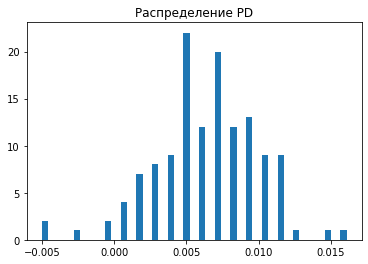

In [96]:
prediction = results.predict(X)
fig, ax = plt.subplots()

ax.hist(prediction, bins = 20, rwidth = 0.4)

ax.set_title('Распределение PD')

plt.show()
fig.savefig('pd_dist.png')

## Логистическая регрессия

In [103]:
data_logit_copy.head()

,index,Класс,PD,Cash,ФА + Деп.,КЗ,Обяз. по договорам,Капитал,Прибыль,Инфляция,RUONIA,Treasury 2,Treasury 5,Treasury 10,IMOEX,ROE,Leverage,АСВ,Кэпт
2,2,2,0.004,0.015214,0.044406,0.000299,0.042786,0.025592,0.150622,0.060894,0.355750,0.705036,0.641304,0.554817,0.743149,0.449014,0.161935,1,0
3,3,2,0.004,0.009316,0.035078,0.000264,0.035748,0.021871,0.149394,0.176974,0.281775,0.859712,0.905797,0.784053,0.569225,0.449966,0.163311,1,0
4,4,2,0.004,0.022589,0.026332,0.000059,0.027470,0.018280,0.144035,0.010466,0.440484,0.449640,0.547101,0.541528,0.315951,0.448725,0.164437,1,0
5,5,0,0.000,0.005720,0.018551,0.008221,0.017280,0.009937,0.190649,0.284491,0.524546,0.219424,0.315217,0.345515,0.329453,0.649305,0.231853,1,0
6,6,4,0.007,0.004058,0.017455,0.010603,0.015963,0.009069,0.138636,1.000000,0.513786,0.215827,0.496377,0.564784,0.223815,0.462881,0.304093,0,0


In [107]:
data_logit_copy.columns

Index(['index', 'Класс', 'PD', 'Cash', 'ФА + Деп.', 'КЗ', 'Обяз. по договорам',
       'Капитал', 'Прибыль', 'Инфляция', 'RUONIA', 'Treasury 2', 'Treasury 5',
       'Treasury 10', 'IMOEX', 'ROE', 'Leverage', 'АСВ', 'Кэпт'],
      dtype='object')

In [108]:
data_logit_copy[['Cash', 'Класс']].head()

,Cash,Класс
2,0.015214,2
3,0.009316,2
4,0.022589,2
5,0.005720,0
6,0.004058,4


Подберем признаки путем перебора всех комбинаций

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_columns = ['Класс']
names_array = np.array([])
acc_array = np.array([])
for element in data_logit_copy.drop(columns = ['index', 'Класс', 'PD']).columns:
    list_columns.append(element)
    df_train, df_test = train_test_split(data_logit_copy[list_columns], test_size = 0.1, random_state = 42)
    X_train_logist, Y_train_logist = df_train.drop(columns = 'Класс'), df_train['Класс'].astype(int)
    X_test_logist, Y_test_logist = df_test.drop(columns = 'Класс'), df_test['Класс'].astype(int)
    model = LogisticRegression().fit(X_train_logist, Y_train_logist)
    pred = model.predict(X_test_logist)
    names_array = np.append(names_array, (', ').join(list_columns))
    acc_array = np.append(acc_array, accuracy_score(pred, Y_test_logist))
acc_table = pd.DataFrame({'Комбинации': names_array, 'Accuracy': acc_array})

In [120]:
acc_table.to_excel('acc_table.xlsx')

Построим распределение данных по рейтингу

In [1]:
X, Y = df_train.drop(columns = 'Класс'), df_train['Класс'].astype(int)
pred = model.predict(X)
fig, ax = plt.subplots()

ax.hist(pred, bins = 20, rwidth = 0.4)

ax.set_title('Распределение рейтинга')

plt.show()
fig.savefig('rate_dist.png')

NameError: name 'df_train' is not defined